**Sistematično iskanje**


Definiramo funkcijo, ki izračuna ftdim\(G\)


In [3]:
from sage.all import *
import matplotlib.pyplot as plt

def na_napake_odporna_metricna_dimenzija(G):
    n = G.num_verts() # izračunam število vozlišč grafa G
    razdalje = G.distance_all_pairs() # matrika razdalj med vsakim parom vozlišč iz G

    # inicializacija CLP:
    p = MixedIntegerLinearProgram(maximization = False) # minimizacija
    x = p.new_variable(binary = True) # ustvarjanje binarne spremenljivke za uporabo znotraj CLP p
    
    # definicija koeficientne matrike A:
    A = {} # oblika slovarja omogoča boljšo shrambo in dostop do našega tipa vrednosti
    for u in range(n):
        for v in range(u + 1, n):
            for i in range(n):
                A[(u, v), i] = 1 if razdalje[u][i] != razdalje[v][i] else 0

    # ciljna funkcija:
    p.set_objective(sum(x[i] for i in range(n)))
    # pogoj: vsak par (u, v) ima vsaj dve razločujoči vozlišči v S:

    for u in range(n):
        for v in range(u + 1, n):
            p.add_constraint(sum(A[(u, v), i] * x[i] for i in range(n)) >= 2)

    # reševanje CLP:
    p.solve()
    na_napake_odporna_razlocujoca_mnozica = [i for i in range(n) if round(p.get_values(x[i])) == 1]


    # vrnemo kardinalnost = moč razločujoče množice:
    return len(na_napake_odporna_razlocujoca_mnozica)


Definiramo še funkcijo, ki izračuna metrično dimenzijo grafa dim\(G\):


In [4]:
def metricna_dimenzija(G):
    n = G.num_verts()
    razdalje = G.distance_all_pairs()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    A = {}
    for u in range(n):
        for v in range(u + 1, n):
            for i in range(n):
                A[(u, v), i] = 1 if razdalje[u][i] != razdalje[v][i] else 0

    p.set_objective(sum(x[i] for i in range(n)))
    for u in range(n):
        for v in range(u + 1, n):
            p.add_constraint(sum(A[(u, v), i] * x[i] for i in range(n)) >= 1)

    p.solve()
    razlocujoca_mnozica = [i for i in range(n) if round(p.get_values(x[i])) == 1]

    return len(razlocujoca_mnozica)


Definiramo funkcijo, ki poišče ustrezne grafe


In [5]:
def poisci_grafe(ciljna_dim, ciljna_ftdim, st_vozlisc):
    # teoretični min je toliko vozlišč, kot je ftdim;
    # v resnici pa je ponavadi potrebnih še več vozlišč
    if st_vozlisc < ciljna_ftdim:
        print(0) # št. ustreznih grafov je 0
    else:
        grafi = [] # dodajali bomo ustrezne grafe
        for G in graphs.nauty_geng(f'{st_vozlisc} -c'): # samo povezani grafi
            dim = metricna_dimenzija(G)
            ftdim = na_napake_odporna_metricna_dimenzija(G)
            if dim == ciljna_dim and ftdim == ciljna_ftdim:
                sosedi = {v: list(G[v]) for v in G} # sosede potrebujemo za risanje grafov
                grafi.append((G, st_vozlisc, dim, ftdim, sosedi))
                plt.figure(figsize = (6, 6))
                plot(G).show()  # izrišem grafe
                plt.close()
    
        return len(grafi) # vrnemo število ustreznih grafov


Funkcijo poisci\_grafe preizkusimo na različnih na napako odpornih dimenzijah in na grafih z različnim številom vozlišč.



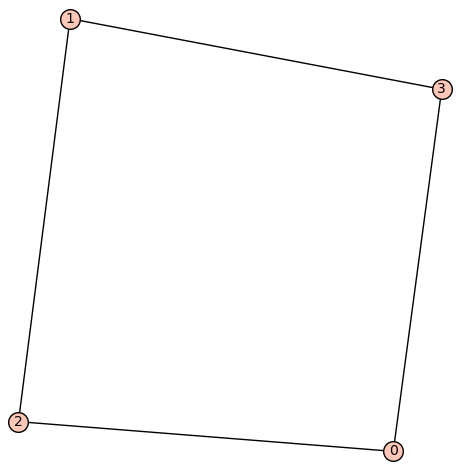

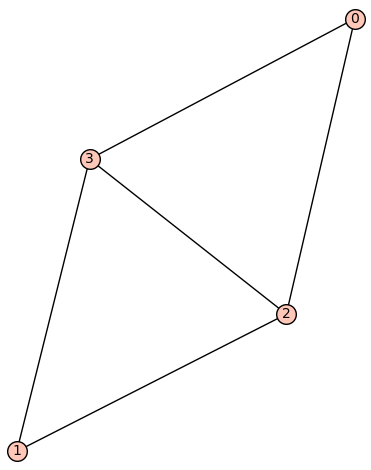

2

In [4]:
poisci_grafe(2, 4, 4)

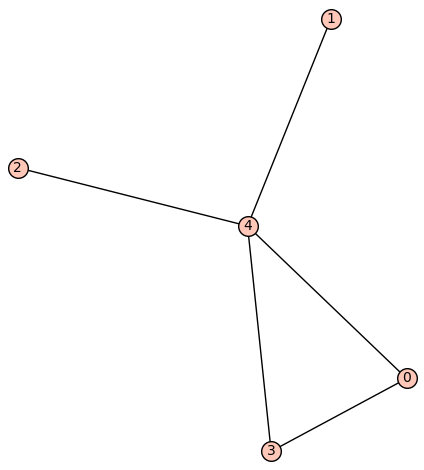

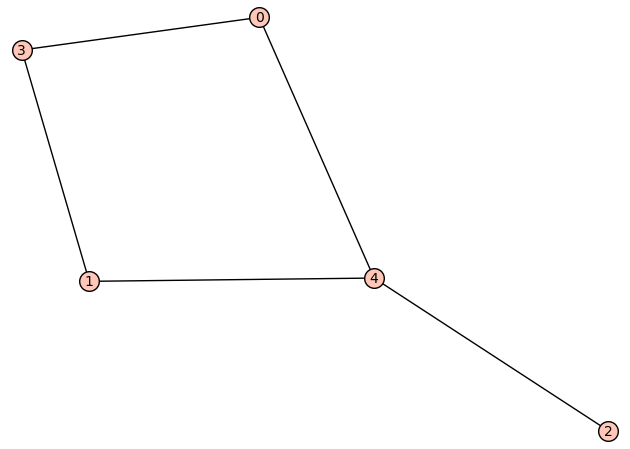

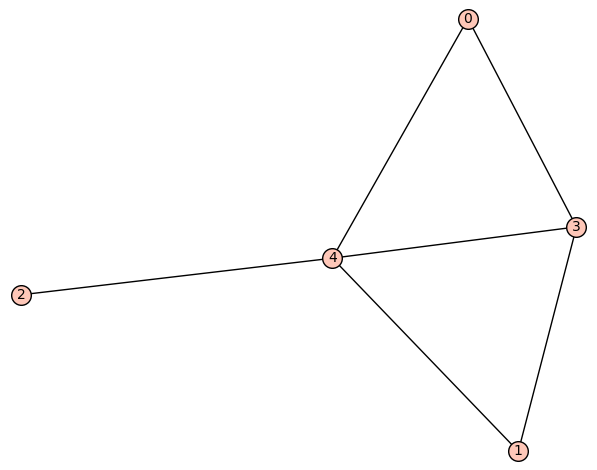

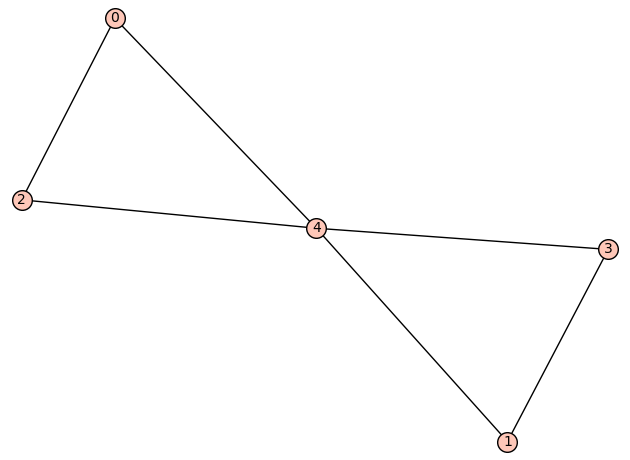

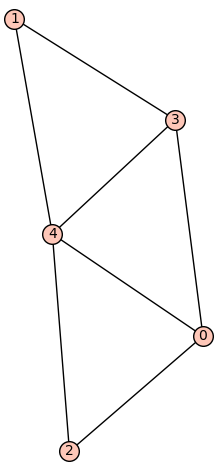

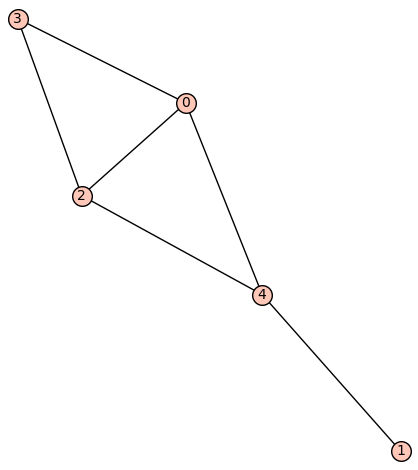

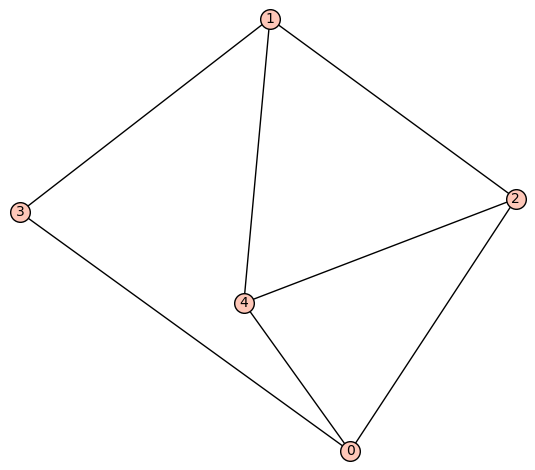

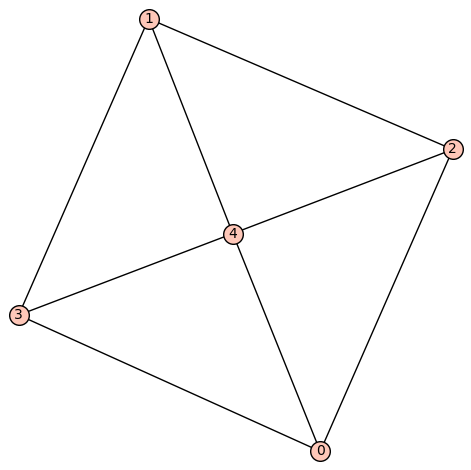

8

In [5]:
poisci_grafe(2, 4, 5)

In [0]:
poisci_grafe(2, 4, 6)

In [0]:
poisci_grafe(2, 4, 7)

In [0]:
poisci_grafe(2, 4, 8)

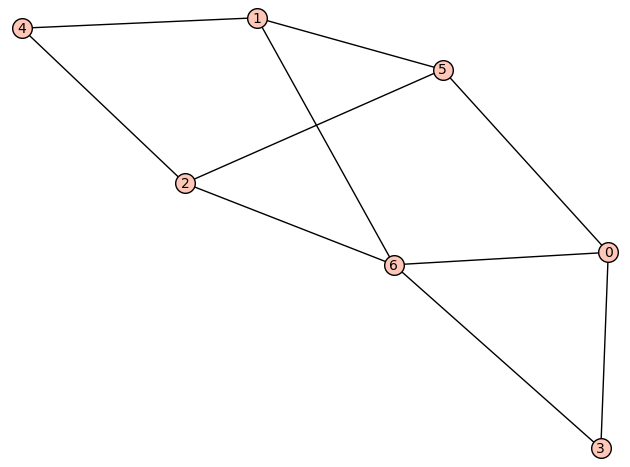

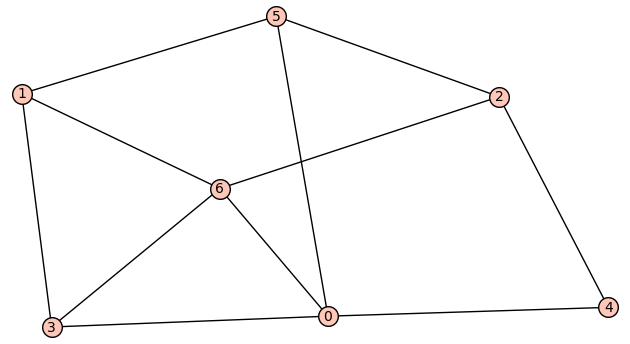

2

In [6]:
poisci_grafe(2, 5, 7)

In [0]:
poisci_grafe(2, 5, 8)